In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

#!pip install 'umap-learn==0.3.10'
import umap.umap_ as umap

from visualizations import *
from semantic_change_scores import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [9]:
## Load representations
#!pip3 install pickle5
import pickle5 as pickle
with open('data/old_slang_reps.pickle', 'rb') as handle:
    old_slang_reps = pickle.load(handle)

with open('data/new_slang_reps.pickle', 'rb') as handle:
    new_slang_reps = pickle.load(handle)
    
with open('data/old_nonslang_reps.pickle', 'rb') as handle:
    old_nonslang_reps = pickle.load(handle)

with open('data/new_nonslang_reps.pickle', 'rb') as handle:
    new_nonslang_reps = pickle.load(handle)

In [11]:
## Load tweets

with open('data/old_slang_tweets.pickle', 'rb') as handle:
    old_slang_tweets = pickle.load(handle)

with open('data/new_slang_tweets.pickle', 'rb') as handle:
    new_slang_tweets = pickle.load(handle)

with open('data/old_nonslang_tweets.pickle', 'rb') as handle:
    old_slang_tweets = pickle.load(handle)

with open('data/new_nonslang_tweets.pickle', 'rb') as handle:
    new_slang_tweets = pickle.load(handle)

In [59]:
ok = 0
for word in new_slang_reps.keys():
    print(word, "\t new: ", len(new_slang_reps[word]), "\t old: ", len(old_slang_reps[word]))
    if (len(new_slang_reps[word]) >= 200) and (len(old_slang_reps[word]) >= 200):
        ok+=1
print("Words with more than 200+200 representations: ", ok)

whadja 	 new:  304 	 old:  353
gotsta 	 new:  397 	 old:  489
pecker 	 new:  481 	 old:  423
sport 	 new:  312 	 old:  417
rehab 	 new:  224 	 old:  471
bumfuck 	 new:  327 	 old:  402
YooKay 	 new:  169 	 old:  10
dafuq 	 new:  578 	 old:  141
bowl 	 new:  517 	 old:  480
bromance 	 new:  331 	 old:  407
gnarly 	 new:  261 	 old:  432
pregos 	 new:  272 	 old:  448
threads 	 new:  427 	 old:  447
God 	 new:  538 	 old:  479
gunt 	 new:  422 	 old:  367
spam 	 new:  479 	 old:  446
KMT 	 new:  405 	 old:  456
hells 	 new:  395 	 old:  467
F2F 	 new:  368 	 old:  431
crappy 	 new:  396 	 old:  493
dis 	 new:  398 	 old:  488
rachet 	 new:  390 	 old:  409
jill 	 new:  291 	 old:  358
blowjob 	 new:  189 	 old:  384
tweeker 	 new:  409 	 old:  421
tool 	 new:  356 	 old:  464
walkie 	 new:  292 	 old:  399
booty 	 new:  335 	 old:  434
spec 	 new:  324 	 old:  433
gag 	 new:  280 	 old:  394
duckface 	 new:  360 	 old:  375
rad 	 new:  304 	 old:  423
revert 	 new:  347 	 old:  466
compy

## PCA

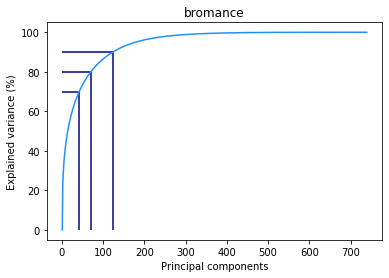

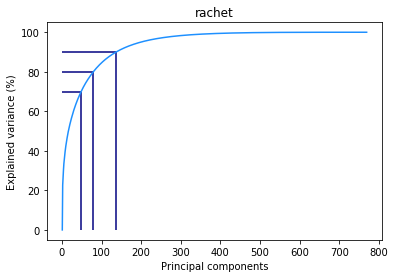

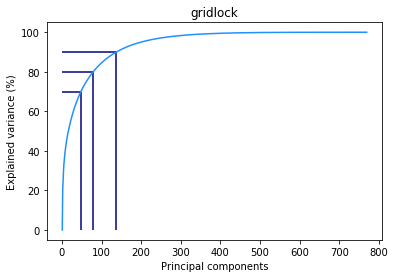

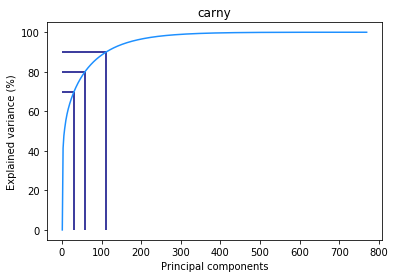

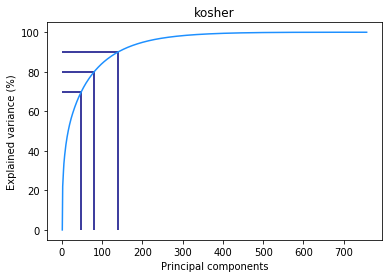

In [52]:
target_examples = ["bromance", "rachet", "gridlock", "carny", "kosher"]
for target in target_examples:
    X1 = [elem.detach().numpy() for elem in old_slang_reps[target]]
    X2 = [elem.detach().numpy() for elem in new_slang_reps[target]]
    X = X1+X2
    pca_model = PCA()
    pca_model.fit(X)
    y = np.cumsum(pca_model.explained_variance_ratio_)*100
    y = np.insert(y, 0, 0)
    x = np.arange(1, y.shape[0]+1)
    plt.plot(x, y, color="dodgerblue")
    plt.title(target)
    plt.ylabel("Explained variance (%)")
    plt.xlabel("Principal components")
    plt.vlines(x=np.where(y >= 70)[0][0], ymin=min(y), ymax=70, color = "navy")
    plt.hlines(y=70, xmin=min(x), xmax=np.where(y >= 70)[0][0], color = "navy")
    #plt.text(np.where(y >= 70)[0][0],0,'70%',rotation=90)
    plt.vlines(x=np.where(y >= 80)[0][0], ymin=min(y), ymax=80, color = "navy")
    plt.hlines(y=80, xmin=min(x), xmax=np.where(y >= 80)[0][0], color = "navy")
    #plt.text(np.where(y >= 80)[0][0],0,'80%',rotation=90)
    plt.vlines(x=np.where(y >= 90)[0][0], ymin=min(y), ymax=90, color = "navy")
    plt.hlines(y=90, xmin=min(x), xmax=np.where(y >= 90)[0][0], color = "navy")
    #plt.text(np.where(y >= 90)[0][0],0,'90%',rotation=90)
    plt.show()


## Clustering

Number of labels:  2


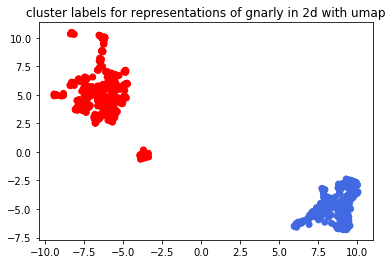

OLD CORPUS EXAMPLES
Class  0  example:
 <s> its a good thing one of my roomies is a dude , who else would kill gnarly spiders in my room when i start to hyperventilate </s>
Class  1  example:
 <s> i have a gnarly cold , so the only thing i have to look foward to this wknd is lots of sleep & the cowboys game ! rt user #gocowboys </s>
----------
NEW CORPUS EXAMPLES
Class  0  example:
 <s> rt user bro my wreck on the scooter was so gnarly like it was fun i love shit like that . i wish i could’ve been on jackass </s>
Class  1  example:
 <s> user user dude took off the headset and looked to clean it . and a cut , while gnarly and graphic , is just a cut , and not life threatening . 🤷🏾‍♂️ </s>


In [79]:
target = "gnarly"
method = "umap"

X1 = [elem.detach().numpy() for elem in old_slang_reps[target]]
X2 = [elem.detach().numpy() for elem in new_slang_reps[target]]
X = X1+X2

if method == "pca":
    X2dim = apply_PCA(X, dim=2)
elif method == "tsne":
    tsne_2dim = TSNE(n_components=2, perplexity=10, learning_rate=200, n_iter=1000)
    X2dim = tsne_2dim.fit_transform(X)
elif method == "umap":
    umap_2dim = umap.UMAP(n_neighbors=15, min_dist = 0.1)
    X2dim = umap_2dim.fit_transform(X)
labels, K, _ = get_clusters_by_silhouette(X2dim, "gmm", k_min=2, k_max=5, seeds=range(0,3), threshold=0.5)
print("Number of labels: ", K)
plot_clusters(X2dim, labels, target, method)

print("OLD CORPUS EXAMPLES")
labels_1, labels_2 = labels[:len(X1)], labels[len(X1):]
for c in set(labels_1):
    idx = list(labels_1).index(c)
    print("Class ", c, " example:\n", " ".join(old_slang_tweets[target][idx]))
print("----------")
print("NEW CORPUS EXAMPLES")
for c in set(labels_2):
    idx = list(labels_2).index(c)
    print("Class ", c, " example:\n", " ".join(new_slang_tweets[target][idx]))

Number of labels:  4


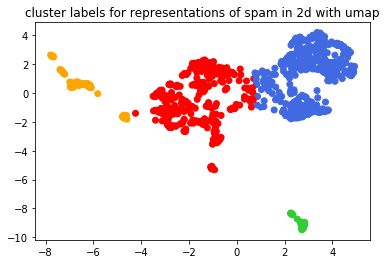

OLD CORPUS EXAMPLES
Class  0  example:
 <s> anxiously awaiting an important e-mail response & i keep getting more spam on my dumb msu acct #angrybbmface #frustrated </s>
Class  1  example:
 <s> user ya just gotta love those spam comments ! </s>
Class  2  example:
 <s> rt user #teamfollow how do you get 100 free twitter followers ? //this is spam </s>
Class  3  example:
 <s> spam up my inbox : user :- ) </s>
----------
NEW CORPUS EXAMPLES
Class  0  example:
 <s> the only thing happening more frequently than iowa state scoring today has been the spam calls from the bahamas .  </s>
Class  1  example:
 <s> rt user this is it . this is my last vote . im gonna spam the shit out of it , and you should do the same with yours . now retweet an… </s>
Class  2  example:
 <s> okay so every few days since the 24th of january ( 2020 ) , i had been writing basically a letter to my ex , i never showed him and it was all in the notes app . so , on my spam page i posted a quick screen recording of it ( i

In [78]:
target = "spam"
method = "umap"

X1 = [elem.detach().numpy() for elem in old_slang_reps[target]]
X2 = [elem.detach().numpy() for elem in new_slang_reps[target]]
X = X1+X2

if method == "pca":
    X2dim = apply_PCA(X, dim=2)
elif method == "tsne":
    tsne_2dim = TSNE(n_components=2, perplexity=10, learning_rate=200, n_iter=1000)
    X2dim = tsne_2dim.fit_transform(X)
elif method == "umap":
    umap_2dim = umap.UMAP(n_neighbors=15, min_dist = 0.1)
    X2dim = umap_2dim.fit_transform(X)
labels, K, _ = get_clusters_by_silhouette(X2dim, "gmm", k_min=2, k_max=5, seeds=range(0,3), threshold=0.5)
print("Number of labels: ", K)
plot_clusters(X2dim, labels, target, method)

print("OLD CORPUS EXAMPLES")
labels_1, labels_2 = labels[:len(X1)], labels[len(X1):]
for c in set(labels_1):
    idx = list(labels_1).index(c)
    print("Class ", c, " example:\n", " ".join(old_slang_tweets[target][idx]))
print("----------")
print("NEW CORPUS EXAMPLES")
for c in set(labels_2):
    idx = list(labels_2).index(c)
    print("Class ", c, " example:\n", " ".join(new_slang_tweets[target][idx]))

Number of labels:  3


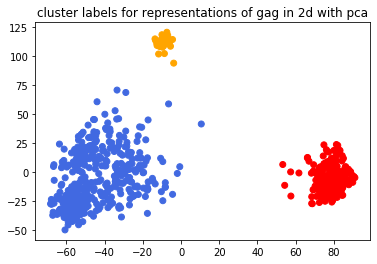

OLD CORPUS EXAMPLES
Class  0  example:
 <s> user i need a pic of you begging if i ' m boiling these because boiled eggs make me gag . :d </s>
Class  1  example:
 <s> lmao rt user user user so i tried that tuna with cheese and my gag reflexes were in full affect ! </s>
Class  2  example:
 <s> gag me with a spoon </s>
----------
NEW CORPUS EXAMPLES
Class  0  example:
 <s> user gag yourself now ! </s>
Class  1  example:
 <s> jumanji : the next level bloopers &amp ; gag reel [ dvd/blu-ray 2020 ] </s>
Class  2  example:
 <s> gag is nicki gonna announce yikes not coming till 2mar on queen radio watch </s>


In [76]:
target = "gag"
method = "pca"

X1 = [elem.detach().numpy() for elem in old_slang_reps[target]]
X2 = [elem.detach().numpy() for elem in new_slang_reps[target]]
X = X1+X2

if method == "pca":
    X2dim = apply_PCA(X, dim=2)
elif method == "tsne":
    tsne_2dim = TSNE(n_components=2, perplexity=10, learning_rate=200, n_iter=1000)
    X2dim = tsne_2dim.fit_transform(X)
elif method == "umap":
    umap_2dim = umap.UMAP(n_neighbors=15, min_dist = 0.1)
    X2dim = umap_2dim.fit_transform(X)
labels, K, _ = get_clusters_by_silhouette(X2dim, "gmm", k_min=2, k_max=5, seeds=range(0,3), threshold=0.5)
print("Number of labels: ", K)
plot_clusters(X2dim, labels, target, method)

print("OLD CORPUS EXAMPLES")
labels_1, labels_2 = labels[:len(X1)], labels[len(X1):]
for c in set(labels_1):
    idx = list(labels_1).index(c)
    print("Class ", c, " example:\n", " ".join(old_slang_tweets[target][idx]))
print("----------")
print("NEW CORPUS EXAMPLES")
for c in set(labels_2):
    idx = list(labels_2).index(c)
    print("Class ", c, " example:\n", " ".join(new_slang_tweets[target][idx]))

## Representations in 2D

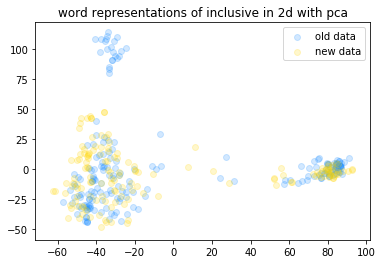

In [56]:
## nonslang
target = "inclusive"
method = "pca"

X1 = [elem.detach().numpy() for elem in old_nonslang_reps[target]]
X2 = [elem.detach().numpy() for elem in new_nonslang_reps[target]]
X = X1+X2

if method == "pca":
    X2dim = apply_PCA(X, dim=2)
elif method == "tsne":
    tsne_2dim = TSNE(n_components=2, perplexity=10, learning_rate=20, n_iter=500, init="pca")
    X2dim = tsne_2dim.fit_transform(X)
elif method == "umap":
    umap_2dim = umap.UMAP(n_neighbors=5, min_dist = 0.3)
    # 10, 0.05
    # 5, 0.3
    X2dim = umap_2dim.fit_transform(X)

plot_one_2d_rep(X2dim[:len(X1)], X2dim[len(X1):], target, method)